# An-Cockrell model reimplementation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import an_cockrell
from an_cockrell import EpiType

In [2]:
%matplotlib inline

In [3]:
model = an_cockrell.AnCockrellModel(
    GRID_WIDTH=51,
    GRID_HEIGHT=51,
    is_bat=False,
    init_dcs=50,
    init_nks=25,
    init_macros=50,
    macro_phago_recovery=0.5,
    macro_phago_limit=1_000,
    inflammasome_activation_threshold=10,  # default 50 for bats
    inflammasome_priming_threshold=1.0,  # default 5.0 for bats
    viral_carrying_capacity=500,
    susceptibility_to_infection=77,
    human_endo_activation=5,
    bat_endo_activation=10,
    bat_metabolic_byproduct=2.0,
    human_metabolic_byproduct=0.2,
    resistance_to_infection=75,
    viral_incubation_threshold=60,
)

* Blue Squares = Healthy Epithelial Cells
* Yellow Squares = Infected Epithelial Cells
* Grey Squares = Epithelial Cells killed by necrosis
* Grey Pentagons = Epithelial Cells killed by apoptosis
* Green Circles = Macrophages
* Large Green Circles = Macrophages at phagocytosis limit
* Orange Circles = NK Cells
* Light Blue Triangles = Dendritic Cells
* Pink Square Outlines = Activated Endothelial Cells
* Small White Circles = PMNs

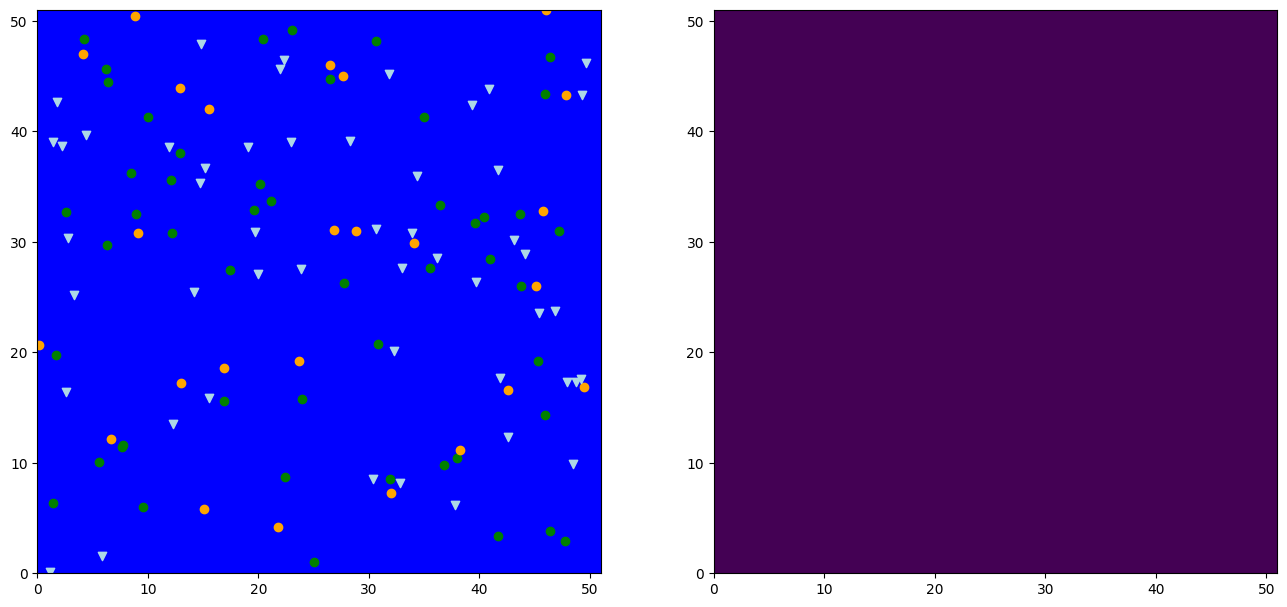

In [4]:

fig, axs = plt.subplots(1, 2,figsize=(16,8))

model.plot_agents(axs[0])
model.plot_field(axs[1], field_name='extracellular_virus')


axs[0].set_aspect(1)
axs[1].set_aspect(1)

In [5]:
model.infect(init_inoculum=100) # Initial-inoculum from 25-150 increments of 25, run for 14 days (2016 steps)

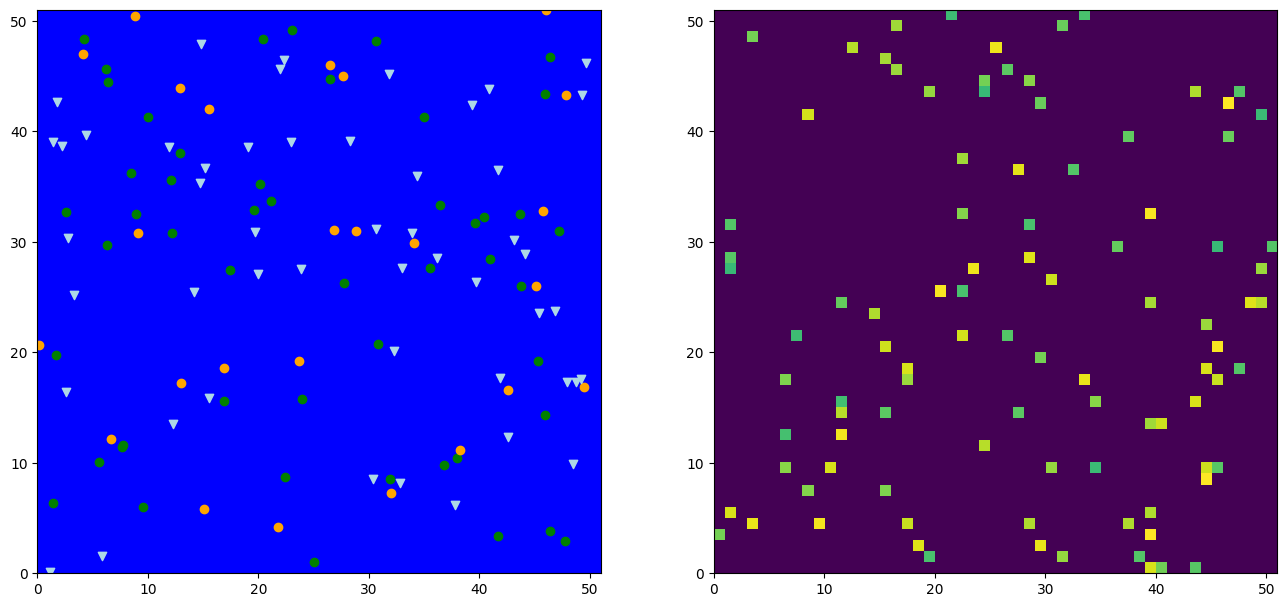

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

model.plot_agents(axs[0])
model.plot_field(axs[1], field_name='extracellular_virus')


axs[0].set_aspect(1)
axs[1].set_aspect(1)

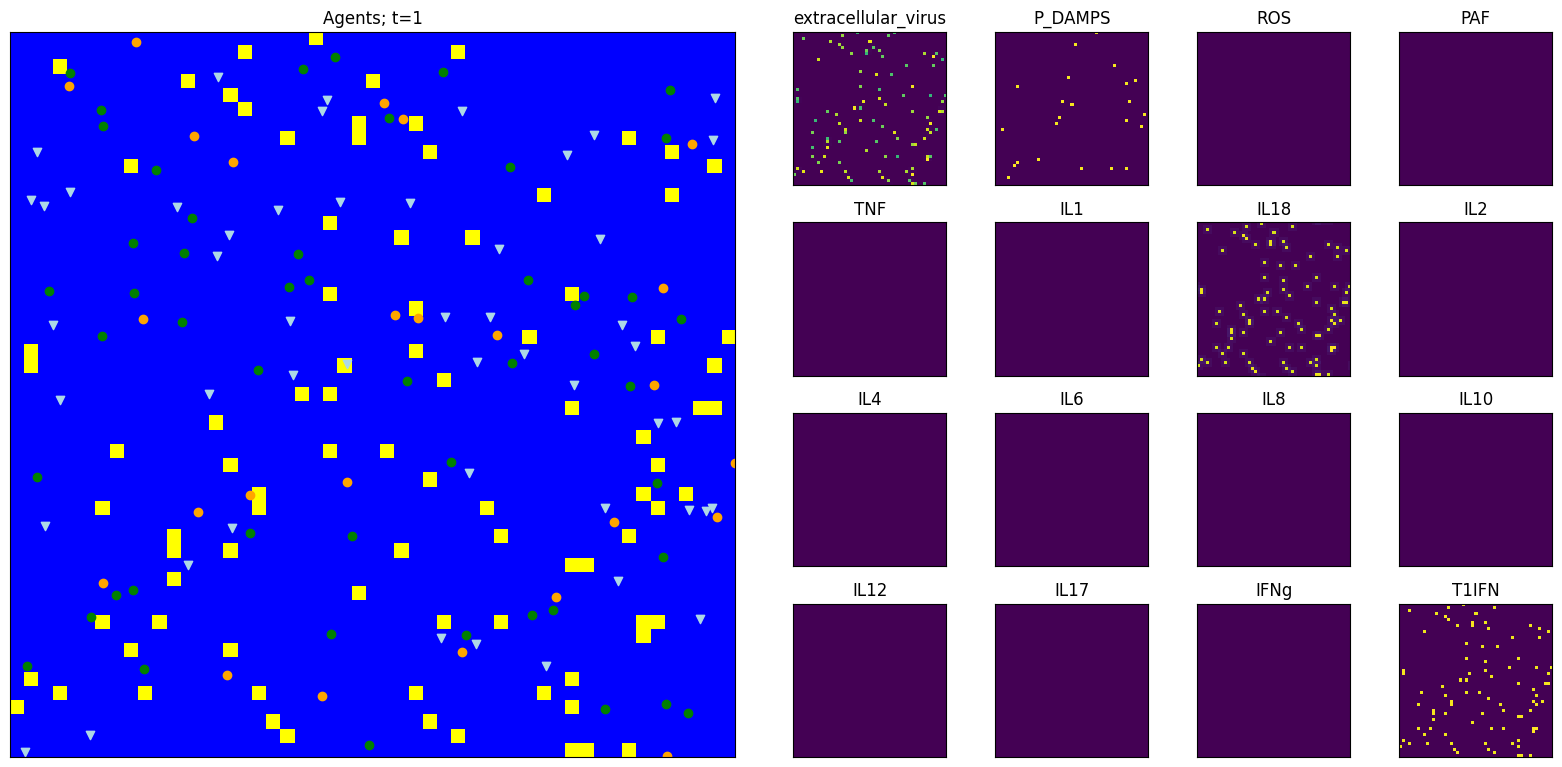

In [7]:
num_steps = 2016 # <- full run value


fig = plt.figure(layout='constrained', figsize=(16, 8))
fig.set_tight_layout(True)

subfigs = fig.subfigures(1, 2, wspace=0.07)

ax = subfigs[0].add_subplot()
axs = subfigs[1].subplots(4, 4)

fields = [
    'extracellular_virus',
    'P_DAMPS',
    'ROS',
    'PAF',
    'TNF',
    'IL1',
    'IL18',
    'IL2',
    'IL4',
    'IL6',
    'IL8',
    'IL10',
    'IL12',
    'IL17',
    'IFNg',
    'T1IFN',
]

total_T1IFN = []
total_TNF = []
total_IFNg = []
total_IL6 = []
total_IL1 = []
total_IL8 = []
total_IL10 = []
total_IL12 = []
total_IL18 = []
total_extracellular_virus = []
total_intracellular_virus = []
apoptosis_eaten_counter = []
infected_epis = []
dead_epis = []
apoptosed_epis = []

def animate(i):
    model.time_step()

    total_T1IFN.append(model.total_T1IFN)
    total_TNF.append(model.total_TNF)
    total_IFNg.append(model.total_IFNg)
    total_IL6.append(model.total_IL6)
    total_IL1.append(model.total_IL1)
    total_IL8.append(model.total_IL8)
    total_IL10.append(model.total_IL10)
    total_IL12.append(model.total_IL12)
    total_IL18.append(model.total_IL18)
    total_extracellular_virus.append(model.total_extracellular_virus)
    total_intracellular_virus.append(model.total_intracellular_virus)
    apoptosis_eaten_counter.append(model.apoptosis_eaten_counter)
    infected_epis.append(np.sum(model.epithelium == EpiType.Infected))
    dead_epis.append(np.sum(model.epithelium == EpiType.Dead))
    apoptosed_epis.append(np.sum(model.epithelium == EpiType.Apoptosed))


    
    model.plot_agents(ax)
    ax.set_title(f'Agents; t={model.time}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_aspect(1)
    
    for k, field in enumerate(fields):
        model.plot_field(axs[k // 4, k % 4], field_name=field)
        axs[k//4, k%4].set_title(field)
        axs[k//4, k%4].get_xaxis().set_visible(False)
        axs[k//4, k%4].get_yaxis().set_visible(False)
        axs[k//4, k%4].set_aspect(1)
    

anim = FuncAnimation(
    fig,
    animate,
    frames=num_steps,
    repeat=False,
    interval=100, # half the default
)

In [8]:
anim.save('model-run.mpg')

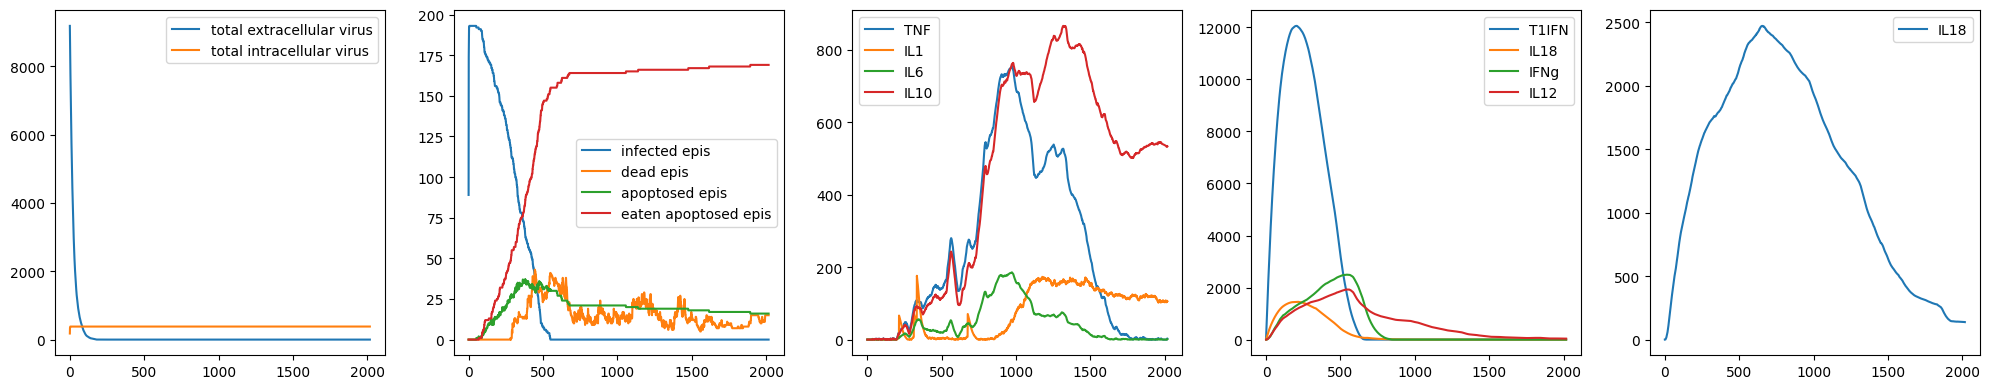

In [9]:
fig = plt.figure(layout='constrained', figsize=(20, 4))
fig.set_tight_layout(True)

axs = fig.subplots(1,5)

axs[0].plot(total_extracellular_virus, label="total extracellular virus")
axs[0].plot(total_intracellular_virus, label="total intracellular virus")
axs[0].legend()

# axs[1] epis
axs[1].plot(infected_epis, label="infected epis")
axs[1].plot(dead_epis, label="dead epis")
axs[1].plot(apoptosed_epis, label="apoptosed epis")
axs[1].plot(apoptosis_eaten_counter, label="eaten apoptosed epis")
axs[1].legend()

axs[2].plot(total_TNF, label="TNF")
axs[2].plot(total_IL1, label="IL1")
axs[2].plot(total_IL6, label="IL6")
axs[2].plot(total_IL10, label="IL10")
axs[2].legend()


axs[3].plot(total_T1IFN, label="T1IFN")
axs[3].plot(total_IL18, label="IL18")
axs[3].plot(total_IFNg, label="IFNg")
axs[3].plot(total_IL12, label="IL12")
axs[3].legend()

axs[4].plot(total_IL8, label="IL18") # not plotted in netlogo version, not sure why
axs[4].legend()
